In [ ]:
import requests, pandas as pd, lxml.html as lh
url="http://pokemondb.net/pokedex/all"
page=requests.get(url)
doc=lh.fromstring(page.content)
tr_elements=doc.xpath('//tr')
col=[]
for t in tr_elements[0]:
    name=t.text_content()
    col.append((name,[]))
for j in range(1,len(tr_elements)):
    T=tr_elements[j]
    if(len(T)!=10):
        break
    i=0
    for t in T.iterchildren():
        data=t.text_content()
        try:
            data=int(data)
        except:
            pass
        col[i][1].append(data)
        i+=1

Dict={title:value for (title,value) in col}
df=pd.DataFrame(Dict)

df.head()

In [96]:
def str_bracket(word):
    c=[x for x in word]
    for i in range(1, len(c)):
        if c[i].isupper():
            c[i]=' ' + c[i]
    final=''.join(c).split(' ')
    if len(final)>1:
        final.insert(1,'(')
        final.append(')')
    return ' '.join(final)

def str_break(word):
    c=[x for x in word]
    for i in range(1, len(c)):
        if c[i].isupper():
            c[i]=' ' + c[i]
    final=''.join(c).split(' ')
    return final

In [97]:
df['Name']=df['Name'].apply(str_bracket)
df['Type']=df['Type'].apply(str_break)
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
1,2,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
2,3,Venusaur,"[Grass, Poison]",525,80,82,83,100,100,80
3,3,Venusaur ( Mega Venusaur ),"[Grass, Poison]",625,80,100,123,122,120,80
4,4,Charmander,[Fire],309,39,52,43,60,50,65


In [98]:
df.to_json('PokemonData.json')
df.to_csv('PokemonData.csv')

In [99]:
df=pd.read_json('PokemonData.json')
df=df.set_index(['#'])
df.head(5)

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
2,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
8,Wartortle,[Water],405,59,63,80,65,80,58
79,Slowpoke,"[Water, Psychic]",315,90,65,65,40,40,15
80,Slowbro,"[Water, Psychic]",490,95,75,110,100,80,30


In [100]:
def max_stats(df,col_list):
    message=''
    for col in col_list:
        name=df[df[col]==df[col].max()]['Name'].values[0]
        stats=df[col].max()
        message+=name+' has the greatest '+col+' of '+str(stats)+'.\n'
    return message

def min_stats(df,col_list):
    message=''
    for col in col_list:
        name=df[df[col]==df[col].min()]['Name'].values[0]
        stats=df[col].min()
        message+=name+' has the worst '+col+' of '+str(stats)+'.\n'
    return message


In [101]:
stats=['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed','Total']
print (max_stats(df,stats))
print (min_stats(df,stats))

Mewtwo ( Mega  Mewtwo  X ) has the greatest Attack of 190.
Steelix ( Mega  Steelix ) has the greatest Defense of 230.
Blissey has the greatest HP of 255.
Mewtwo ( Mega  Mewtwo  Y ) has the greatest Sp. Atk of 194.
Shuckle has the greatest Sp. Def of 230.
Deoxys ( Speed  Forme ) has the greatest Speed of 180.
Mewtwo ( Mega  Mewtwo  X ) has the greatest Total of 780.

Chansey has the worst Attack of 5.
Chansey has the worst Defense of 5.
Shedinja has the worst HP of 1.
Shuckle has the worst Sp. Atk of 10.
Caterpie has the worst Sp. Def of 20.
Shuckle has the worst Speed of 5.
Wishiwashi ( Solo  Form ) has the worst Total of 175.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212CE5A9240>,
      dtype=object)

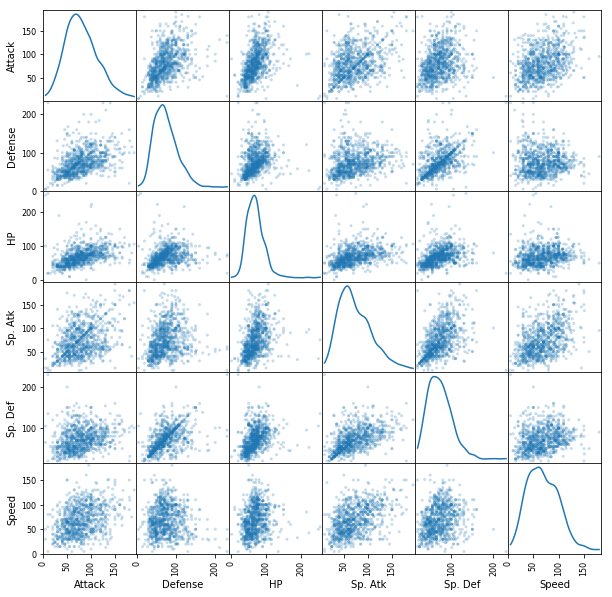

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[stats[:-1]],alpha=0.25,figsize=(10,10),diagonal='kde')

Defence and Sp. Defence have +ve correlation.

Other stats mostly show low R^2 values. 

HP feature has the least variance.

Speed feature seems to have the highest variance.

In [102]:
newDict={}
stats_col=["#","Name","Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]
Dict['Type']=df['Type'].values
#print(Dict)
for col in stats_col:
    newDict[col]=[]
newDict['Type']=[]
#print(newDict)

for row in range(len(Dict['#'])):
    for t in (Dict['Type'][row]):
        #print(t)
        for col in stats_col:
            #Append all columns except Type to the new dictionary
            newDict[col].append(Dict[col][row])
        #Appending the Type separately for each Pokemon  in the new dictionary
        newDict['Type'].append(t)
#new_df = pd.DataFrame(newDict)
#new_df.head(20)
#print(Dict)
#for row in range(len(Dict['#'])):
  #  for t in (Dict['Type'][row]):
    #    print(t)
new_df = pd.DataFrame(newDict)
new_df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type
0,1,Bulbasaur,318,45,49,49,65,65,45,Grass
1,1,Bulbasaur,318,45,49,49,65,65,45,Poison
2,2,Ivysaur,405,60,62,63,80,80,60,Grass
3,2,Ivysaur,405,60,62,63,80,80,60,Poison
4,3,Venusaur,525,80,82,83,100,100,80,Water


In [103]:
types=new_df['Type'].unique()
print(len(types))
print(types)

18
['Grass' 'Poison' 'Water' 'Psychic' 'Electric' 'Steel' 'Normal' 'Flying'
 'Ice' 'Dark' 'Ghost' 'Rock' 'Ground' 'Dragon' 'Bug' 'Fire' 'Fighting'
 'Fairy']


In [104]:
import six, matplotlib.pyplot as plt
from itertools import cycle,islice
from matplotlib import colors

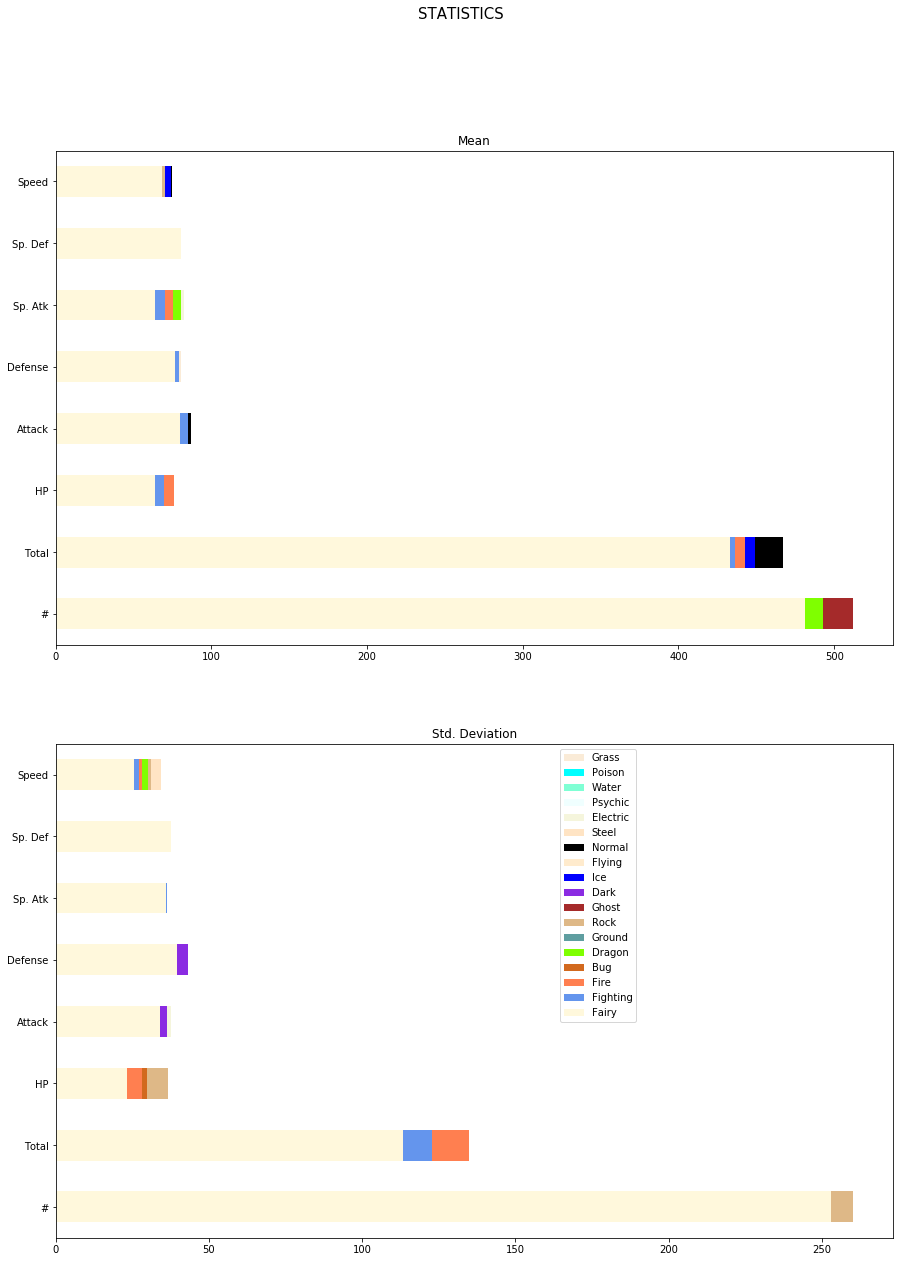

In [143]:
my_colors=list(six.iteritems(colors.cnames))
my_colors=list(islice(cycle(my_colors),None,len(new_df)))
def barh_stats():
    i=0
    plt.figure(figsize=(15,20))
    plt.suptitle('STATISTICS',fontsize=15)
    
    for t in types:
        i+=1
        plt.subplot(2,1,1)
        plt.title('Mean')
        new_df[new_df['Type']==t].mean().plot(kind='barh',color=my_colors[i])
        
        plt.subplot(2,1,2)
        plt.title('Std. Deviation')
        new_df[new_df['Type']==t].std().plot(kind='barh',color=my_colors[i])
        
    plt.legend(types,bbox_to_anchor=(0.7,1))
barh_stats()

Ice has the highest mean speed.

Dragon->fire->fighting: Top 3 mean Sp. Attack.

Fire->Fighting: Top 2 mean HP.

Fighting: Top mean Attack, Defence.


Dark: Highest std. deviation in Attack, Defence.

Rock->Bug->Fire: std. deviation for in HP.